# Applied Machine Learning 2
## Course project          
                                                 Author: Diego Rodriguez
## Data exploration

Start by some quick data exploration. Perform the following tasks

- Plot a few images from each category
- Make a scree plot, how many components explain 10%, 20%, ..., 90% and 100% of the variance?
- Visualize the features on a 2d-plot with PCA using the first two components. What can you say about the results?

In [1]:
import numpy as np  
import matplotlib.pyplot as plt

# Load the npz file
base_dir = '/Users/rodriguezmod/Downloads/swissroads/'

with np.load(base_dir+'features.npz', allow_pickle=False) as npz_file: 
    # It's a dictionary-like object 
    print(list(npz_file.keys()))
    
    # Load arrays    
    # Merging test and validation features data to use a cross-validation approach to model fitting.
    X_tr = np.concatenate((npz_file['train_features'], npz_file['validation_features']))
    X_tr_pixels = np.concatenate((npz_file['train_pixels'], npz_file['validation_pixels']))
    y_tr = np.concatenate((npz_file['train_labels'], npz_file['validation_labels']))
    # Reduce to 1-dim
    y_tr = np.argmax(y_tr, axis=1)

    X_te = npz_file['test_features']
    X_te_pixels = npz_file['test_pixels']
    y_te = npz_file['test_labels']
    # Reduce to 1-dim
    y_te = np.argmax(y_te, axis=1)

['train_features', 'validation_features', 'test_features', 'train_labels', 'validation_labels', 'test_labels', 'train_pixels', 'validation_pixels', 'test_pixels']


## Plot images
Plot a few images from each category

bike


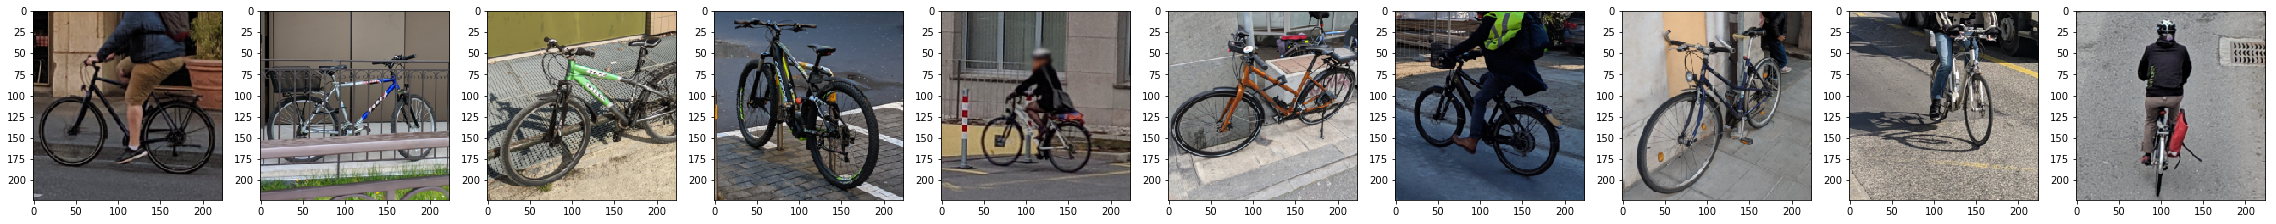

car


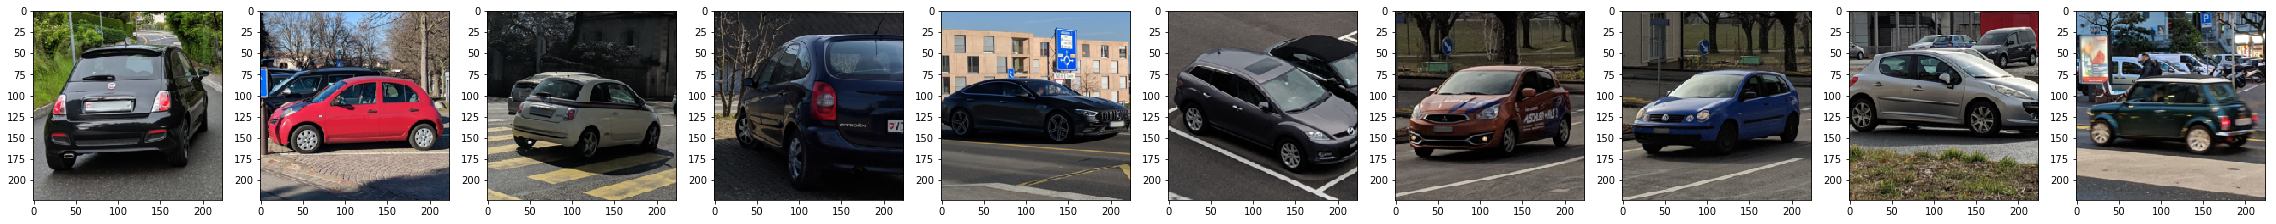

motorcycle


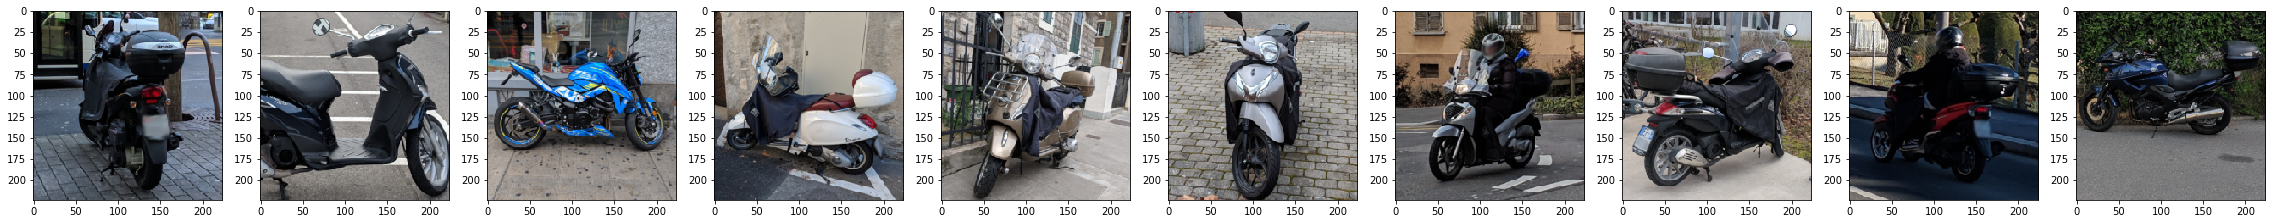

other


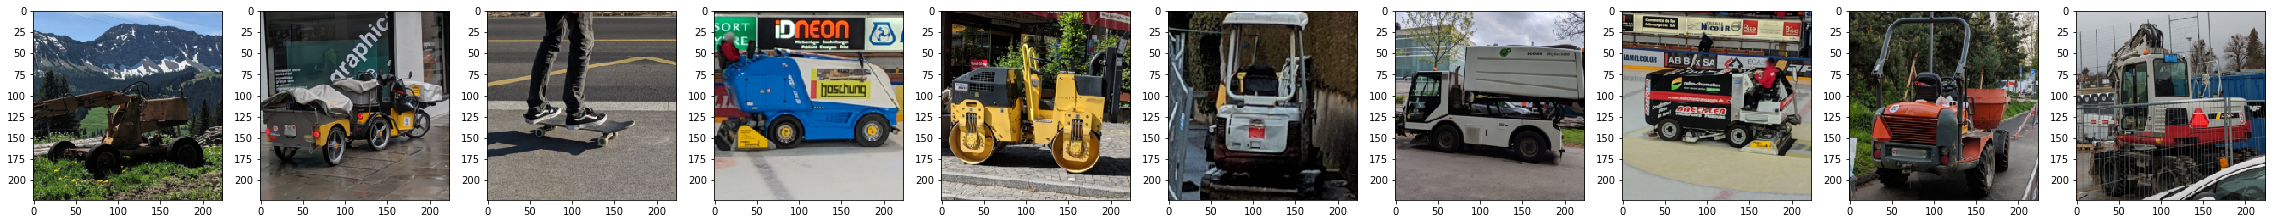

truck


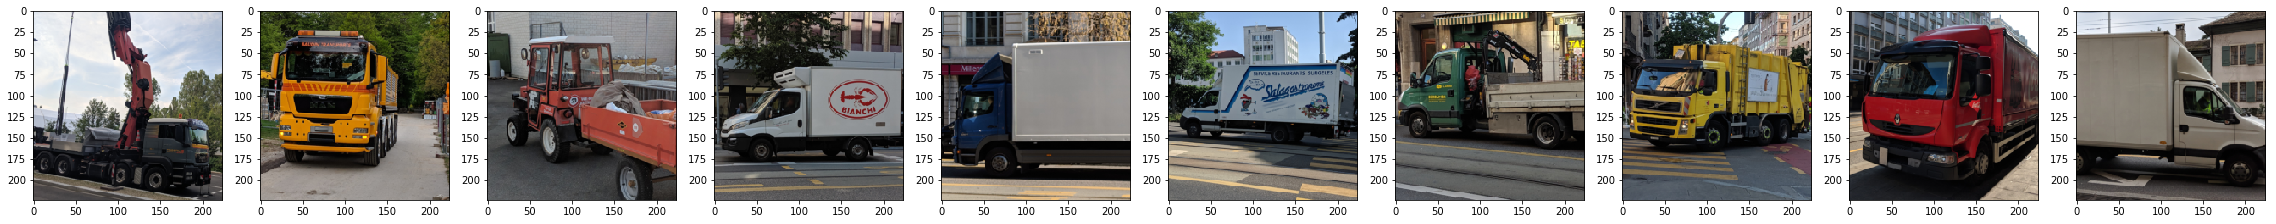

van


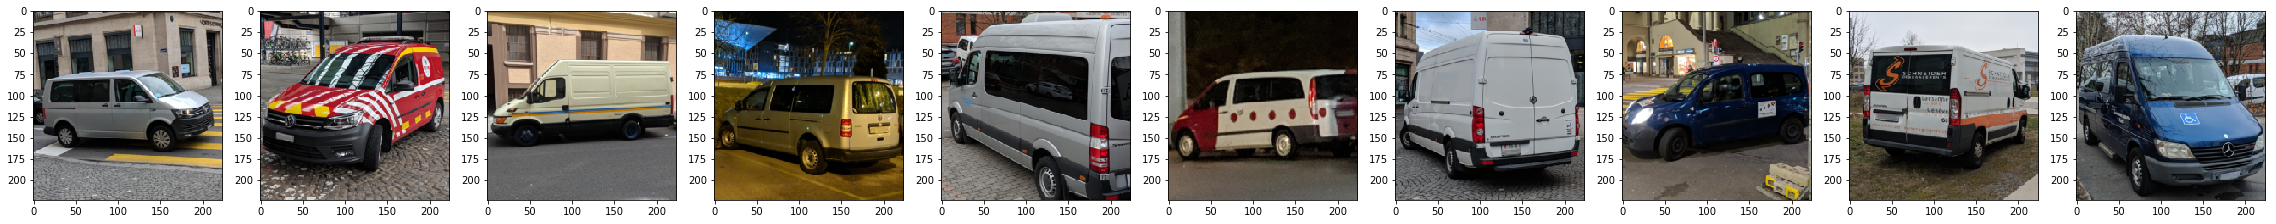

In [2]:
import imageio
import numpy as np

category = ["bike","car","motorcycle","other","truck","van"]

# Function to show 10 samples of each category
def image_sampling(start):
    
    # Filter labels by category and take first ten
    ver = np.where(y_tr==start)[0][0:10]
    
    # Specifying the overall figure size
    plt.figure(figsize=(40,40)) 
    print(category[start])
    
    for i in range(0,10):   
        plt.subplot(1,10,i+1) 
        img = X_tr_pixels[ver[i]]
        # Plot the image
        plt.imshow(img)
    plt.show()

# Calling function
image_sampling(0)
image_sampling(1)
image_sampling(2)
image_sampling(3)
image_sampling(4)
image_sampling(5)

## Scree plot analysis
Make a scree plot, how many components explain 10%, 20%, ..., 90% and 100% of the variance?

In [3]:
from sklearn.decomposition import PCA

# Create PCA transformer
pca = PCA(n_components=None)

# Apply PCA to rescaled data
pca.fit(X_tr)

# Proportion of variance explained
pve = pca.explained_variance_ratio_

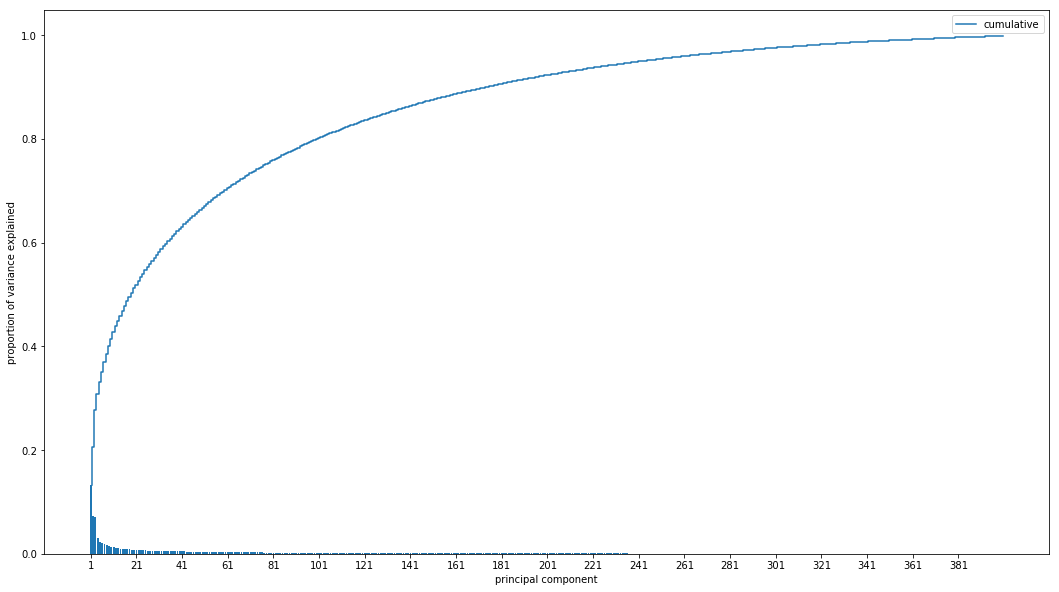

In [4]:
# Create bar plot
fig, ax = plt.subplots(figsize=(18,10))

# Number to reduce or increase zoom in x axis
num_pve = 400 # total pve= 419

# Extract explained variance ratio
xcor = np.arange(1, len(pve[0:num_pve]) + 1)
plt.bar(xcor, pve[0:num_pve])
plt.xticks(xcor)
plt.xticks(np.arange(1,num_pve, step=20))

# Add cumulative sum
pve_cumsum = np.cumsum(np.round(pve[0:num_pve],decimals=4))
plt.step(
    xcor+0.5, # 1.5,2.5,..,n_components+0.5
    pve_cumsum, # Cumulative sum
    label='cumulative'
)

# Add labels
plt.xlabel('principal component')
plt.ylabel('proportion of variance explained')
plt.legend()
plt.show()

The diagram shows how the proportion of variance explained grows by 10% each step when the number of principal components is doubled. As observed in the values in the following table (approximate values).

| Variance Explained | Number PC |
| --- | -: |
| 10% | 1 |
| 20% | 2 | 
| 30% | 4 | 
| 40% | 8 | 
| 50% | 16 | 
| 60% | 38 | 
| 70% | 54 | 
| 80% | 100 | 
| 90% | 190 | 
| 100% | 419 | 

## PCA plot

Visualize the features on a 2d-plot with PCA using the first two components. What can you say about the results?

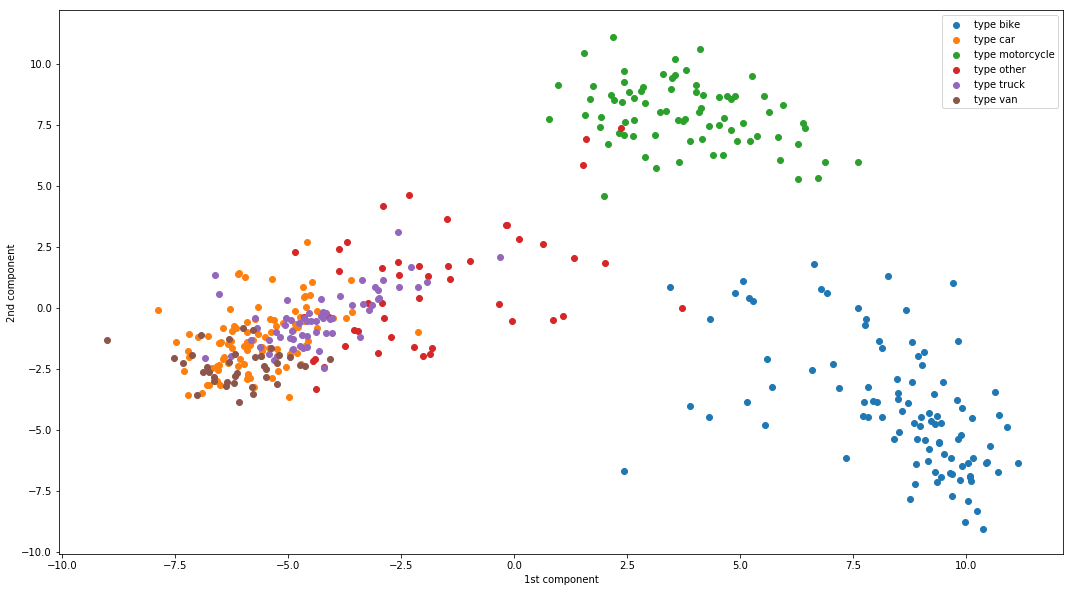

In [5]:
# Project data onto the first two components
X_2d = pca.transform(X_tr)

# Plot with two components
fig, ax = plt.subplots(figsize=(18,10))

# Plot each category, i.e."bike" = 0, "car" = 1
for kind in [0, 1, 2, 3, 4, 5]:
    
    # Picture samples of this type
    idx = (y_tr == kind)
    label = category[kind]
    
    # Plot their components
    plt.scatter(
        X_2d[idx, 0], X_2d[idx, 1],
        label='type {}'.format(label)
    )

# Labels and legend
plt.legend()
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.show()

The plot shows that there are three clusters defined groups **"bike"** in blue, **"motorcycle"** in green. The third group is made up of the remaining categories; These are superimposed on each other, making their classification difficult at first glance. It is interesting to note that motorcycles and bicycles could be confused with each other due to their shape (two wheels one passenger) but the plot shows inverse: they are well defined with each other; and more than this, they are well defined in contrast with the rest of the categories. It is to be expected that **"van"**, **"truck"**, and **"car"** are mixed in a cluster since their shape is approximately similar.

In the case of **"other"** it is observed that they overlap with the previous groups (**"van"**, **"truck"**, and **"car"**) but they are also distributed towards **"bike"** and **"motorcycle"**. These are expected because some of the images in this group shares features of all these groups.